In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Load an Excel file
file_path = 'res_test_with_ai.xlsx'  # Change this to the path of your Excel file
data = pd.read_excel(file_path, header=0)

In [78]:
# Display the first few rows of the data
print(data.columns)

Index(['Model', 'Folder', 'File', 'Question', 'Answer', 'prompt tokens',
       'completion tokens', 'total tokens', 'cost', 'not_mention',
       'Correct Answer', 'AI Answer'],
      dtype='object')


Plot, average correct answer with the tools. Bars and grids

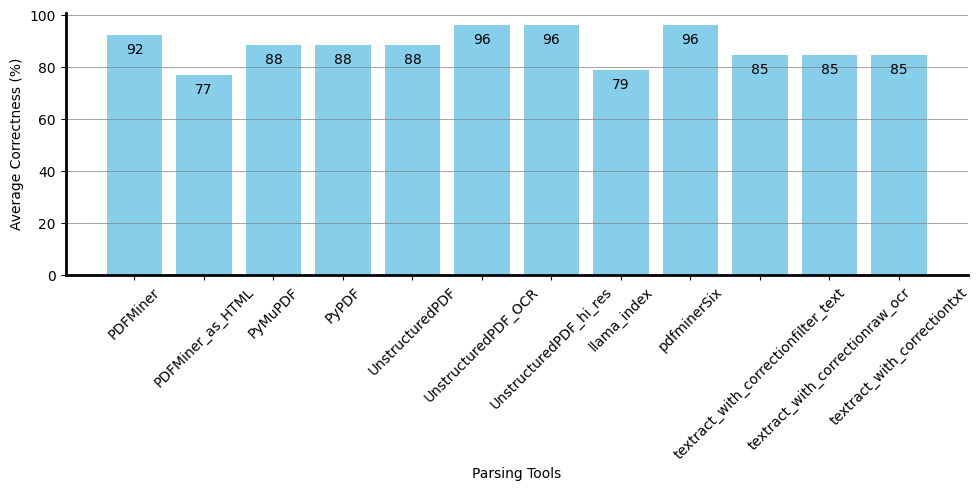

In [79]:
# Calculate the average correctness for each file
grouped_data = data.groupby('File')['AI Answer'].mean() * 100

# Plotting the average correctness for each file
plt.figure(figsize=(10, 5))
bars = plt.bar(grouped_data.index, grouped_data, color='skyblue')
# plt.title('Average Correctness per Parsing Tool')
plt.xlabel('Parsing Tools')
plt.ylabel('Average Correctness (%)')
plt.xticks(rotation=45)


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Annotating each bar within the bar, slightly below the top for visibility
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 3,  # Adjust the vertical position inside the bar
             f'{int(round(yval))}', ha='center', va='top', color='black')  # Change the text color to white for visibility

# Adding grid lines to the background for better readability
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', axis='y')  # Grid lines along the y-axis

plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('Average_Correctness_per_Tools_bars_grids.pdf', format='pdf')

plt.show()


Avergae correctness per file, all tools and LLMs

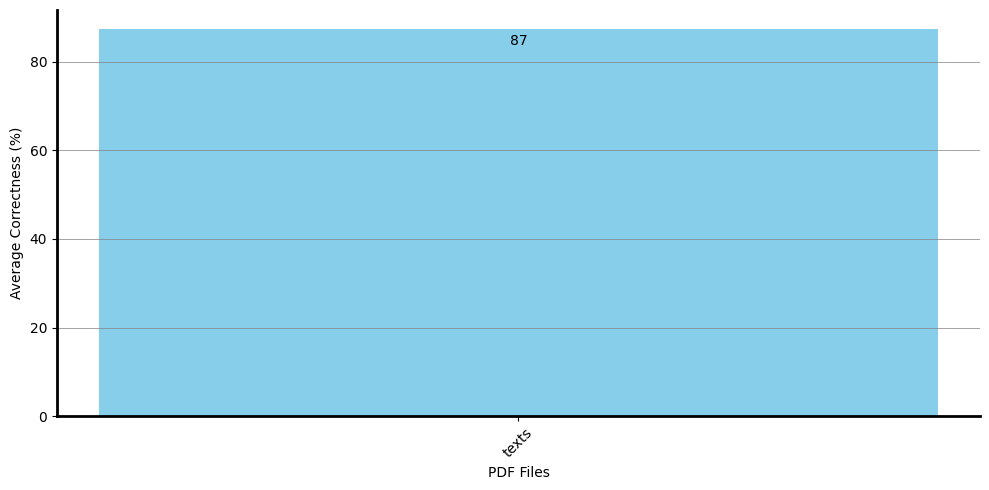

In [80]:
# Calculate the average correctness for each file
grouped_data = data.groupby('Folder')['AI Answer'].mean() * 100
# Plotting the average correctness for each file
plt.figure(figsize=(10, 5))
bars = plt.bar(grouped_data.index, grouped_data, color='skyblue')
# plt.title('Average Correctness per File')
plt.xlabel('PDF Files')
plt.ylabel('Average Correctness (%)')
plt.xticks(rotation=45)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Annotating each bar within the bar, slightly below the top for visibility
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 1,  # Adjust the vertical position inside the bar
             f'{int(round(yval))}', ha='center', va='top', color='black')  # Change the text color to white for visibility

# Adding grid lines to the background for better readability
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', axis='y')  # Grid lines along the y-axis

plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('Average_Correctness_per_file.pdf', format='pdf')

plt.show()

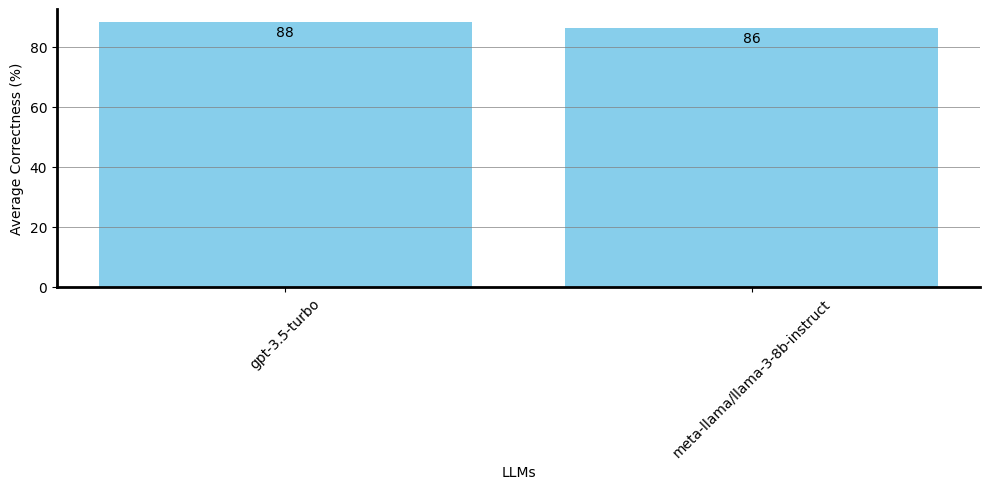

In [81]:
# Calculate the average correctness for each file
grouped_data = data.groupby('Model')['AI Answer'].mean() * 100
# Plotting the average correctness for each file
plt.figure(figsize=(10, 5))
bars = plt.bar(grouped_data.index, grouped_data, color='skyblue')
# plt.title('Average Correctness per LLM')
plt.xlabel('LLMs')
plt.ylabel('Average Correctness (%)')
plt.xticks(rotation=45)


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Annotating each bar within the bar, slightly below the top for visibility
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 1,  # Adjust the vertical position inside the bar
             f'{int(round(yval))}', ha='center', va='top', color='black')  # Change the text color to white for visibility

# Adding grid lines to the background for better readability
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', axis='y')  # Grid lines along the y-axis

plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('Average_Correctness_per_LLM.pdf', format='pdf')

plt.show()

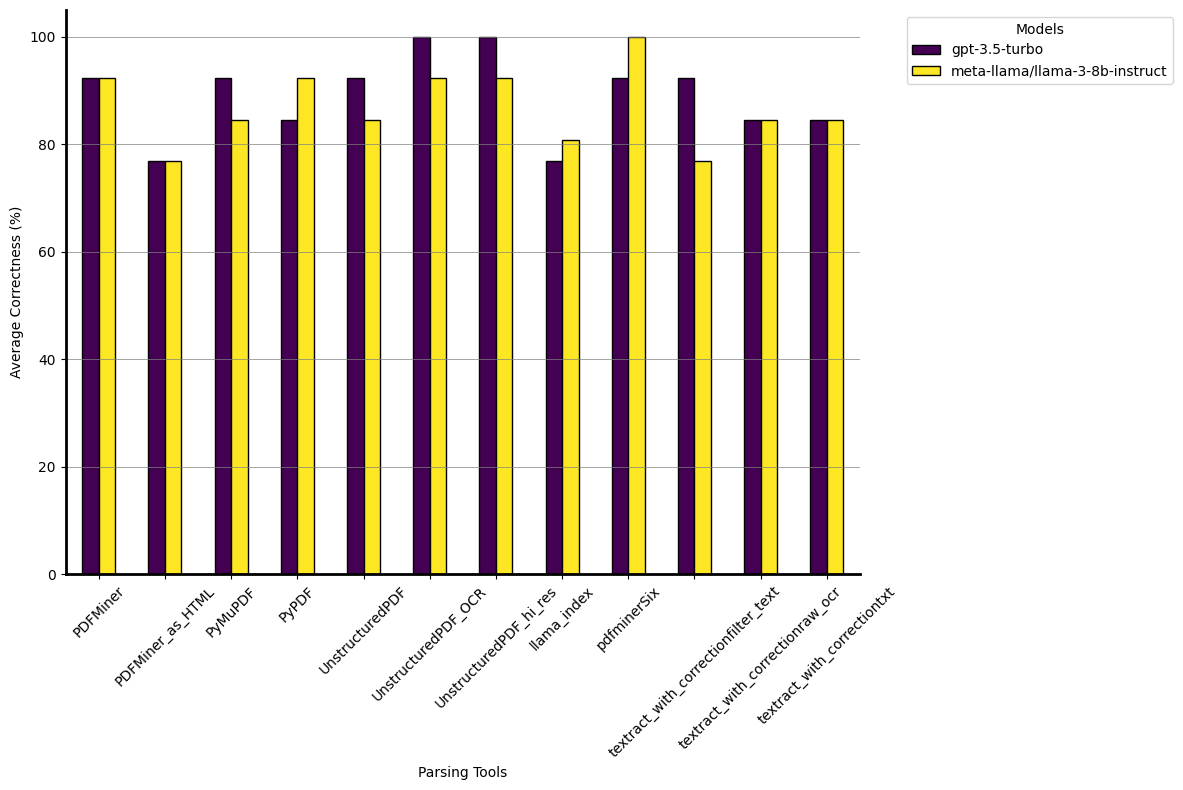

In [82]:
# Assuming 'data' is your DataFrame and it has been imported correctly
# Calculate the average correctness for each model and tool combination
grouped_data = data.groupby(['Model', 'File'])['AI Answer'].mean() * 100
# This unstacks the 'File' level of the index to columns, useful for certain types of visualizations
grouped_data = grouped_data.unstack('Model')

# Plotting the average correctness for each tool and model using a vertical bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax, colormap='viridis', edgecolor='black')

# ax.set_title('Average Correctness per LLM and Parsing Tool')
ax.set_ylabel('Average Correctness (%)')
ax.set_xlabel('Parsing Tools')
ax.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Adding grid lines to the background for better readability
ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', axis='y')  # Grid lines along the y-axis
plt.xticks(rotation=45)
plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('Average_Correctness_per_LLM_and_Tools_stacked.pdf', format='pdf')

plt.show()


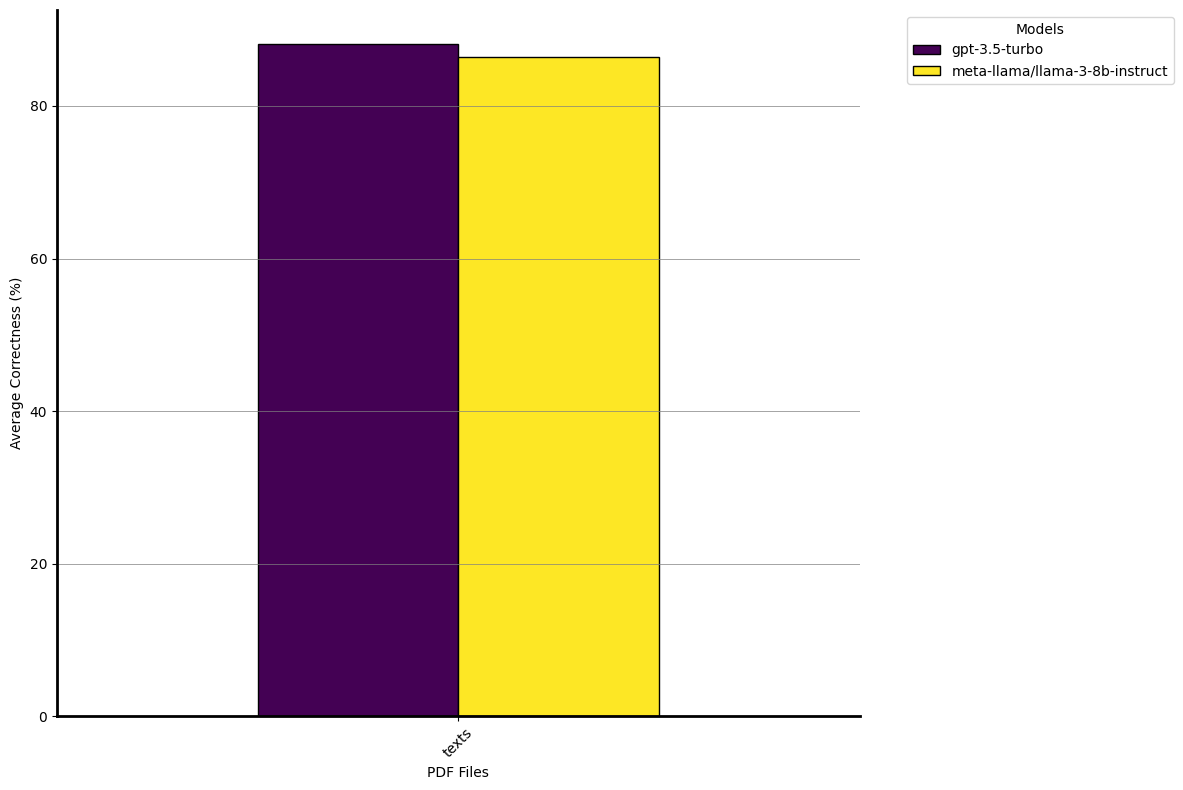

In [83]:

# Calculate the average correctness for each model and tool combination
# Assuming 'data' is your DataFrame that includes columns with names as provided
grouped_data = data.groupby(['Model', 'Folder'])['AI Answer'].mean() * 100
# This unstacks the 'File' level of the index to columns, useful for certain types of visualizations
grouped_data = grouped_data.unstack('Model')

# Plotting the average correctness for each tool and model using a vertical bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax, colormap='viridis', edgecolor='black')

# ax.set_title('Average Correctness per LLM and Parsing Tool')
ax.set_ylabel('Average Correctness (%)')
ax.set_xlabel('PDF Files')
ax.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Adding grid lines to the background for better readability
ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', axis='y')  # Grid lines along the y-axis

plt.xticks(rotation=45)
plt.tight_layout()

# Saving the plot as a PDF file
plt.savefig('Average_Correctness_per_LLM_and_files_stacked.pdf', format='pdf')

plt.show()


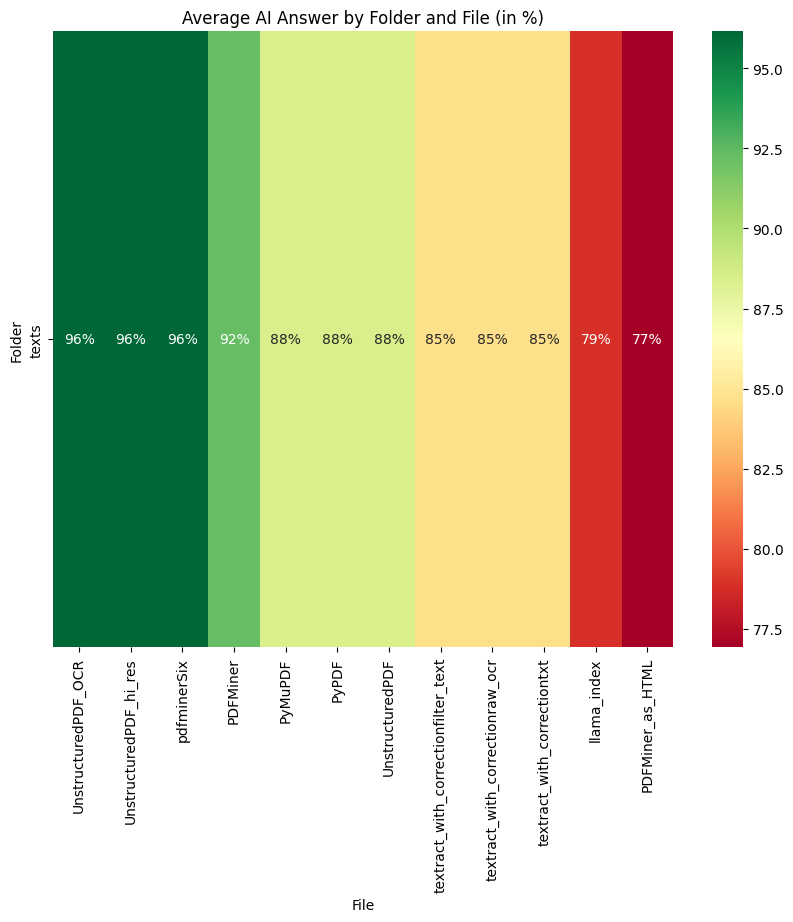

In [84]:
import seaborn as sns

# Group by folder and file, then calculate the mean of AI Answer
heatmap_data = data.groupby(['Folder', 'File'])['AI Answer'].mean().unstack()

# Convert to percentage
heatmap_data_percentage = heatmap_data * 100

# Sort the files based on their average scores from highest to lowest
sorted_columns = heatmap_data_percentage.mean().sort_values(ascending=False).index
heatmap_data_percentage_sorted = heatmap_data_percentage[sorted_columns]

# Create annotations
annotations = (heatmap_data_percentage_sorted.round(0).astype(int).astype(str) + '%').values

# Generate the heatmap with custom formatted annotations
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_percentage_sorted, annot=annotations, cmap='RdYlGn', fmt="")
plt.title('Average AI Answer by Folder and File (in %)')
plt.xlabel('File')
plt.ylabel('Folder')
plt.show()


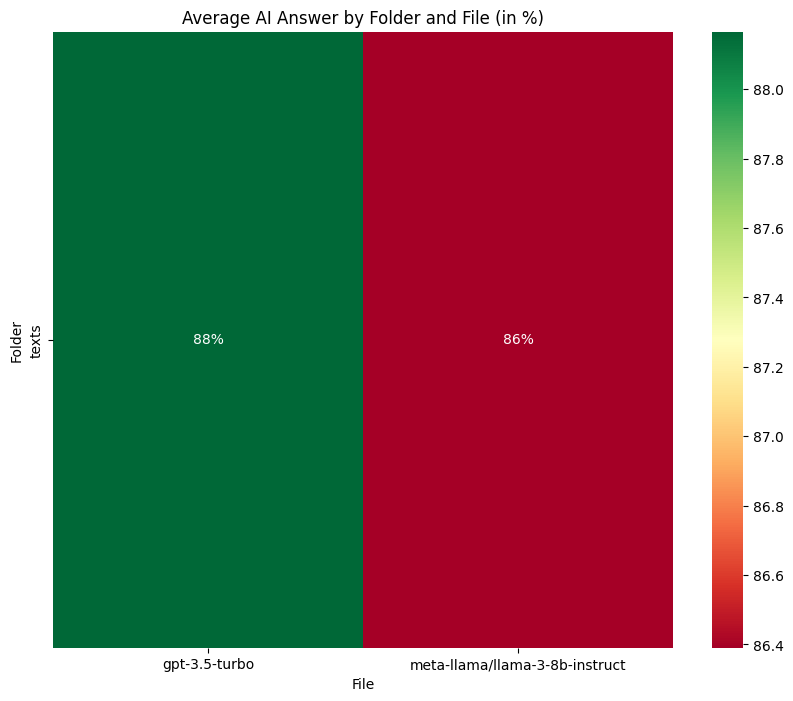

In [85]:
# Group by folder and file, then calculate the mean of AI Answer
heatmap_data = data.groupby(['Folder', 'Model'])['AI Answer'].mean().unstack()

# Convert to percentage
heatmap_data_percentage = heatmap_data * 100

# Sort the files based on their average scores from highest to lowest
sorted_columns = heatmap_data_percentage.mean().sort_values(ascending=False).index
heatmap_data_percentage_sorted = heatmap_data_percentage[sorted_columns]

# Create annotations
annotations = (heatmap_data_percentage_sorted.round(0).astype(int).astype(str) + '%').values

# Generate the heatmap with custom formatted annotations
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_percentage_sorted, annot=annotations, cmap='RdYlGn', fmt="")
plt.title('Average AI Answer by Folder and File (in %)')
plt.xlabel('File')
plt.ylabel('Folder')
plt.show()

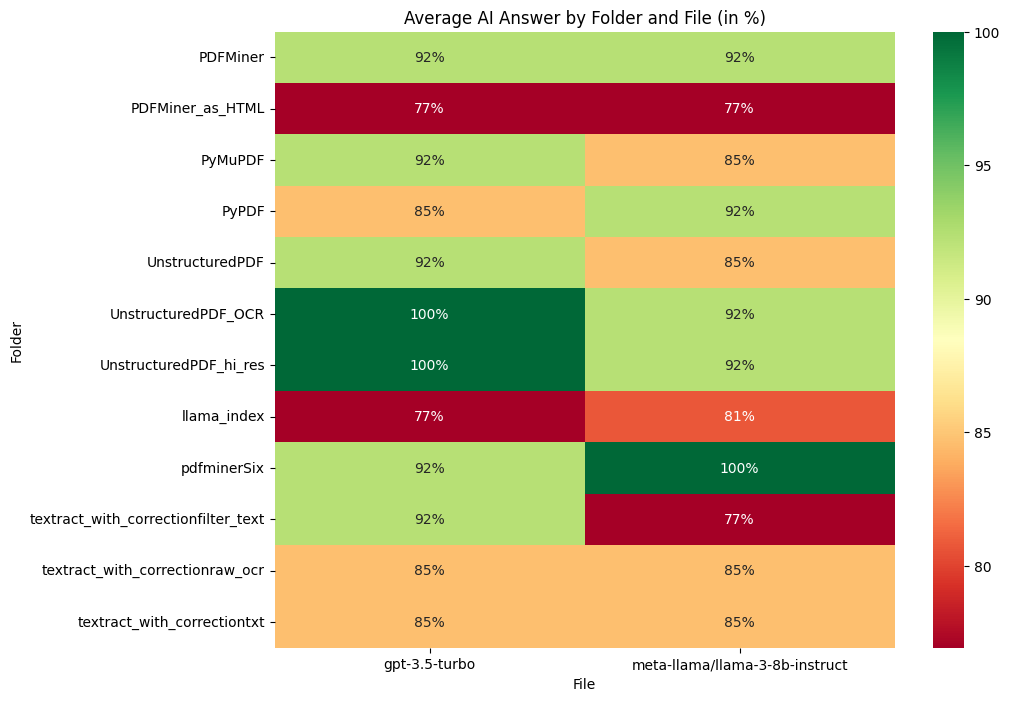

In [86]:
# Group by folder and file, then calculate the mean of AI Answer
heatmap_data = data.groupby(['File', 'Model'])['AI Answer'].mean().unstack()

# Convert to percentage
heatmap_data_percentage = heatmap_data * 100

# Sort the files based on their average scores from highest to lowest
sorted_columns = heatmap_data_percentage.mean().sort_values(ascending=False).index
heatmap_data_percentage_sorted = heatmap_data_percentage[sorted_columns]

# Create annotations
annotations = (heatmap_data_percentage_sorted.round(0).astype(int).astype(str) + '%').values

# Generate the heatmap with custom formatted annotations
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_percentage_sorted, annot=annotations, cmap='RdYlGn', fmt="")
plt.title('Average AI Answer by Folder and File (in %)')
plt.xlabel('File')
plt.ylabel('Folder')
plt.show()